<a href="https://colab.research.google.com/github/Living-with-machines/ai4lam-huggingface-datasets-demo/blob/main/datasets_demo_ai4lam_nov_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to 🤗 datasets 

In [1]:
%%capture
!pip install pyarrow datasets --upgrade

## Loading datasets

There are various ways in which we can load datasets into the datasets library

In [15]:
from datasets import load_dataset

### Loading from a local file

In [3]:
%%bash
wget -O 1850_1859.tar.gz https://bl.iro.bl.uk/downloads/a6a44ea8-8d33-4880-8b17-f89c90e3d89a?locale=en
tar -xvf 1850_1859.tar.gz 

1850_1859/
1850_1859/1856_000736095.jsonl.gz
1850_1859/1856_000723566.jsonl.gz
1850_1859/1854_003480519.jsonl.gz
1850_1859/1854_003379261.jsonl.gz
1850_1859/1858_003327307.jsonl.gz
1850_1859/1857_002212776.jsonl.gz
1850_1859/1853_003631567.jsonl.gz
1850_1859/1857_001746002.jsonl.gz
1850_1859/1855_001894336.jsonl.gz
1850_1859/1850_001988654.jsonl.gz
1850_1859/1856_002541022.jsonl.gz
1850_1859/1859_001187143.jsonl.gz
1850_1859/1854_000550828.jsonl.gz
1850_1859/1856_002745131.jsonl.gz
1850_1859/1854_003987918.jsonl.gz
1850_1859/1856_001988658.jsonl.gz
1850_1859/1857_000759756.jsonl.gz
1850_1859/1851_000172357.jsonl.gz
1850_1859/1857_001902443.jsonl.gz
1850_1859/1858_003689335.jsonl.gz
1850_1859/1854_001156637.jsonl.gz
1850_1859/1852_002182134.jsonl.gz
1850_1859/1850_003365424.jsonl.gz
1850_1859/1859_002064287.jsonl.gz
1850_1859/1858_001436112.jsonl.gz
1850_1859/1854_001471499.jsonl.gz
1850_1859/1855_000401669.jsonl.gz
1850_1859/1857_001935280.jsonl.gz
1850_1859/1857_003316936.jsonl.gz
185

In [4]:
ds = load_dataset("json", data_files="/content/1850_1859/1850_000024685.jsonl.gz")

Streaming output truncated to the last 5000 lines.
1046350K .......... .......... .......... .......... .......... 80%  156M 9s
1046400K .......... .......... .......... .......... .......... 80%  247M 9s
1046450K .......... .......... .......... .......... .......... 80%  271M 9s
1046500K .......... .......... .......... .......... .......... 80%  236M 9s
1046550K .......... .......... .......... .......... .......... 80%  264M 9s
1046600K .......... .......... .......... .......... .......... 80%  235M 9s
1046650K .......... .......... .......... .......... .......... 80%  291M 9s
1046700K .......... .......... .......... .......... .......... 80% 44.0M 9s
1046750K .......... .......... .......... .......... .......... 80%  209M 9s
1046800K .......... .......... .......... .......... .......... 80% 6.78M 9s
1046850K .......... .......... .......... .......... .......... 80%  138M 9s
1046900K .......... .......... .......... .......... .......... 80%  240M 9s
1046950K .......... .....

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-595c8f4628afa416/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
ds

DatasetDict({
    train: Dataset({
        features: ['record_id', 'date', 'raw_date', 'title', 'place', 'empty_pg', 'text', 'pg', 'mean_wc_ocr', 'std_wc_ocr', 'Name', 'All names', 'Publisher', 'Country of publication 1', 'All Countries of publication', 'Physical description', 'Language_1', 'Language_2', 'Language_3', 'Language_4', 'multi_language'],
        num_rows: 400
    })
})

### Loading from the Hugging Face hub

We can also load datasets hosted on the Hugging Face hub

In [6]:
ds = load_dataset('biglam/cultural_heritage_metadata_accuracy')

Generating train split:   0%|          | 0/100821 [00:00<?, ? examples/s]

Dataset cultural_heritage_metadata_accuracy downloaded and prepared to /root/.cache/huggingface/datasets/biglam___cultural_heritage_metadata_accuracy/default/1.1.0/1ff8da2dbd32ead423527b6c51d138b880edddcd366201c1c8769c28789a81b1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
ds

DatasetDict({
    train: Dataset({
        features: ['metadata_text', 'label', 'source'],
        num_rows: 100821
    })
})

In [8]:
ds['train']

Dataset({
    features: ['metadata_text', 'label', 'source'],
    num_rows: 100821
})

In [9]:
ds['train'][0]

{'metadata_text': 'Figure:putto.Oggetti:ghirlanda di fiori',
 'label': 0,
 'source': 'OpereArteVisiva'}

## Loading a specific configuration


In [10]:
from datasets import get_dataset_config_names


In [11]:
get_dataset_config_names("biglam/europeana_newspapers")

['sv',
 'ru',
 'no_language_found',
 'sr',
 'fr',
 'fi',
 'pl',
 'ji',
 'uk',
 'hr',
 'multi_language',
 'et',
 'el',
 'de']

In [13]:
ds = load_dataset("biglam/europeana_newspapers", "pl")
len(ds['train'])

  0%|          | 0/1 [00:00<?, ?it/s]

108192

In [17]:
ds = load_dataset("biglam/europeana_newspapers", "pl", min_decade=1890)
len(ds['train'])

Generating train split: 0 examples [00:00, ? examples/s]

Dataset europeana_newspapers downloaded and prepared to /root/.cache/huggingface/datasets/biglam___europeana_newspapers/pl-min_decade=1890/0.0.0/106e51a3e64eb4268ccf1f690ed78ce002e3b5a8930bd96a2a644a9c3081a442. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

105076

## Converting to pandas

In [18]:
ds = load_dataset('biglam/cultural_heritage_metadata_accuracy')

  0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
df = ds['train'].to_pandas()
df

,metadata_text,label,source
0,Figure:putto.Oggetti:ghirlanda di fiori,0,OpereArteVisiva
1,Decorazione plastica.,0,OpereArteVisiva
2,Scultura..Figure:angelo,0,OpereArteVisiva
3,Custodia di reliquiario in legno intagliato e ...,1,OpereArteVisiva
4,Portale.,0,OpereArteVisiva
...,...,...,...
100816,PARTE DESTRA DI TIMPANO CON ROSETTA ACROTERIAL...,1,Architettura
100817,TIMPANO E PULVINI.TETTO A DOPPIO SPIOVENTE.NEL...,0,Architettura
100818,APERTURA AD ARCO A TUTTO SESTO;RETRO PIATTO;DU...,1,Architettura
100819,CORNICE MODANATA;TIMPANO CENTINATO E PULVINI C...,0,Architettura


## Support for images

In [20]:
dataset = load_dataset("biglam/brill_iconclass")

Generating train split:   0%|          | 0/87744 [00:00<?, ? examples/s]

Dataset brill_iconclass downloaded and prepared to /root/.cache/huggingface/datasets/biglam___brill_iconclass/default/1.1.0/5e586635c105dfe75ebef049fdf8295f0d687d715e45fb5b9dae923c96a43b4c. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

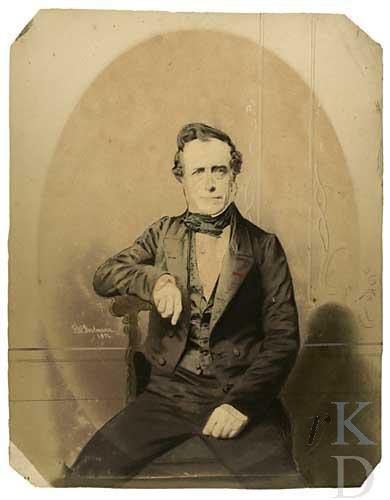

In [21]:
dataset['train'][0]['image']

## Support for audio

In [21]:
from datasets import load_dataset

dataset = load_dataset("lewtun/music_genres", split="train[:5%]")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/lewtun___parquet/lewtun--music_genres-11d7d0e89a099f09/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


# Grab specific rows

In [22]:
train_10_20_ds = load_dataset('biglam/cultural_heritage_metadata_accuracy', split='train[10:20]')

Grab a percentage of a dataset split

In [23]:
train_5_percent = load_dataset('blbooks','1700_1799',split='train[:5%]')

Generating train split:   0%|          | 0/178224 [00:00<?, ? examples/s]

Dataset blbooks downloaded and prepared to /root/.cache/huggingface/datasets/blbooks/1700_1799/1.0.2/3850a908c26c45581e803ae92c9b9bc4704292c0b0029c23ad7010b5f5fbc043. Subsequent calls will reuse this data.


In [24]:
train_5_percent

Dataset({
    features: ['record_id', 'date', 'raw_date', 'title', 'place', 'empty_pg', 'text', 'pg', 'mean_wc_ocr', 'std_wc_ocr', 'name', 'all_names', 'Publisher', 'Country of publication 1', 'all Countries of publication', 'Physical description', 'Language_1', 'Language_2', 'Language_3', 'Language_4', 'multi_language'],
    num_rows: 8911
})

# Streaming

In [25]:
dataset = load_dataset('blbooks','1700_1799',split='train',streaming=True)

In [26]:
dataset

In [27]:
next(iter(dataset))

{'record_id': '000036540',
 'date': datetime.datetime(1754, 1, 1, 0, 0),
 'raw_date': '1754',
 'title': 'The Pleasures of Imagination, etc. (The fifth edition.)',
 'place': 'London',
 'empty_pg': False,
 'text': 'THE PLEASURES O F IMAGINATION. A POEM. The FIFTH EDITION.',
 'pg': 5,
 'mean_wc_ocr': 0.71,
 'std_wc_ocr': 0.252,
 'name': 'Akenside, Mark',
 'all_names': 'Akenside, Mark [person]',
 'Publisher': 'R. Dodsley',
 'Country of publication 1': 'England',
 'all Countries of publication': 'England',
 'Physical description': 'xi, 136 pages (8°)',
 'Language_1': 'English',
 'Language_2': None,
 'Language_3': None,
 'Language_4': None,
 'multi_language': False}

## Filtering a streaming dataset to generate a sample 

In [28]:
good_ocr = dataset.filter(lambda example: example['mean_wc_ocr']>0.8)

In [29]:
good_ocr_10_000 = good_ocr.take(10_000)

In [30]:
import pandas as pd

In [31]:
df = pd.DataFrame(list(good_ocr_10_000))

In [32]:
df

,record_id,date,raw_date,title,place,empty_pg,text,pg,mean_wc_ocr,std_wc_ocr,...,all_names,Publisher,Country of publication 1,all Countries of publication,Physical description,Language_1,Language_2,Language_3,Language_4,multi_language
0,002414234,1798-01-01,1798,Comments on the plays of Beaumont and Fletcher...,London,False,IX recital may frequently supply the apparent ...,17,0.804,0.156,...,"Steevens, George [person] ; Shakespeare, Willi...",None,England,England,None,English,None,None,None,False
1,002414234,1798-01-01,1798,Comments on the plays of Beaumont and Fletcher...,London,False,"15 Page 60. Melantius Diphilus, Thou com'st as...",35,0.807,0.161,...,"Steevens, George [person] ; Shakespeare, Willi...",None,England,England,None,English,None,None,None,False
2,002414234,1798-01-01,1798,Comments on the plays of Beaumont and Fletcher...,London,False,"23 Late means lately. So, in the first part of...",43,0.809,0.167,...,"Steevens, George [person] ; Shakespeare, Willi...",None,England,England,None,English,None,None,None,False
3,002414234,1798-01-01,1798,Comments on the plays of Beaumont and Fletcher...,London,False,51 Alluding to the bushes formerly hung out at...,71,0.824,0.152,...,"Steevens, George [person] ; Shakespeare, Willi...",None,England,England,None,English,None,None,None,False
4,002414234,1798-01-01,1798,Comments on the plays of Beaumont and Fletcher...,London,False,"83 That is, by slights founded on an high opin...",103,0.812,0.169,...,"Steevens, George [person] ; Shakespeare, Willi...",None,England,England,None,English,None,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4143,000835100,1774-01-01,1774,The Fashionable Lover. Miss Obre oder die gere...,Leipzig,False,"101 SC. VII] THE DUENNA Duen. Why, you little ...",181,0.850,0.165,...,"Cumberland, Richard, 1732-1811 [person]",None,None,None,196 pages (8°),English,None,None,None,False
4144,000835100,1774-01-01,1774,The Fashionable Lover. Miss Obre oder die gere...,Leipzig,False,"102 THE DUENNA [act III by a trick, a false pr...",182,0.861,0.142,...,"Cumberland, Richard, 1732-1811 [person]",None,None,None,196 pages (8°),English,None,None,None,False
4145,000835100,1774-01-01,1774,The Fashionable Lover. Miss Obre oder die gere...,Leipzig,False,"105 sc. vii] THE DUENNA d'Almanza, Don Guzman'...",185,0.873,0.134,...,"Cumberland, Richard, 1732-1811 [person]",None,None,None,196 pages (8°),English,None,None,None,False
4146,000835100,1774-01-01,1774,The Fashionable Lover. Miss Obre oder die gere...,Leipzig,False,"III 106 THE DUENNA [act Let us laugh and play,...",186,0.849,0.143,...,"Cumberland, Richard, 1732-1811 [person]",None,None,None,196 pages (8°),English,None,None,None,False


## Loading from Pandas

In [35]:
from datasets import Dataset

In [36]:
ds = Dataset.from_pandas(df)

In [37]:
ds

Dataset({
    features: ['record_id', 'date', 'raw_date', 'title', 'place', 'empty_pg', 'text', 'pg', 'mean_wc_ocr', 'std_wc_ocr', 'name', 'all_names', 'Publisher', 'Country of publication 1', 'all Countries of publication', 'Physical description', 'Language_1', 'Language_2', 'Language_3', 'Language_4', 'multi_language'],
    num_rows: 4148
})

## Push datasets to the hub

In [45]:
from huggingface_hub import notebook_login

In [46]:
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token


In [47]:
ds.push_to_hub("davanstrien/ai4lam-demo")

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

[https://huggingface.co/datasets/davanstrien/ai4lam-demo](https://huggingface.co/datasets/davanstrien/ai4lam-demo)

## Processing datasets

In [43]:
ds[0]['title']

'Comments on the plays of Beaumont and Fletcher: with an appendix, containing some further observations on Shakespeare, extended to the late editions of Malone and Steevens. L.P'

In [47]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [48]:
from nltk.corpus import stopwords

In [51]:
english_stop_words = stopwords.words('english')

In [55]:
def remove_stop_words(text):
    text_split = text.split(" ")
    return " ".join([word for word in text_split if word not in set(english_stop_words)])

In [56]:
remove_stop_words(ds[0]['title'])

'Comments plays Beaumont Fletcher: appendix, containing observations Shakespeare, extended late editions Malone Steevens. L.P'

In [57]:
ds.map(lambda x: {'title no stop words': remove_stop_words(x['title'])})

  0%|          | 0/4148 [00:00<?, ?ex/s]

Dataset({
    features: ['record_id', 'date', 'raw_date', 'title', 'place', 'empty_pg', 'text', 'pg', 'mean_wc_ocr', 'std_wc_ocr', 'name', 'all_names', 'Publisher', 'Country of publication 1', 'all Countries of publication', 'Physical description', 'Language_1', 'Language_2', 'Language_3', 'Language_4', 'multi_language', 'title no stop words'],
    num_rows: 4148
})

In [ ]:
ds.map(lambda x: {'title no stop words': remove_stop_words(x['title'])})

In [61]:
ds = load_dataset('blbooks','1700_1799',split='train',streaming=False)

In [62]:
ds.map(lambda x: {'title no stop words': remove_stop_words(x['title'])})

  0%|          | 0/178224 [00:00<?, ?ex/s]

KeyboardInterrupt: ignored

In [64]:
ds = ds.map(lambda x: {'title no stop words': remove_stop_words(x['title'])},num_proc=4)

In [65]:
ds

Dataset({
    features: ['record_id', 'date', 'raw_date', 'title', 'place', 'empty_pg', 'text', 'pg', 'mean_wc_ocr', 'std_wc_ocr', 'name', 'all_names', 'Publisher', 'Country of publication 1', 'all Countries of publication', 'Physical description', 'Language_1', 'Language_2', 'Language_3', 'Language_4', 'multi_language', 'title no stop words'],
    num_rows: 178224
})

### Hub api

In [48]:
from huggingface_hub import HfApi
api = HfApi()

In [49]:
from huggingface_hub import DatasetSearchArguments, DatasetFilter

In [50]:
dataset_args = DatasetSearchArguments()
dataset_args

Available Attributes or Keys:
 * author
 * benchmark
 * dataset_name
 * language_creators
 * languages
 * licenses
 * multilinguality
 * size_categories
 * task_categories
 * task_ids

In [52]:
author_filter = DatasetFilter(
  author='biglam'
)

In [53]:
api.list_datasets(filter=author_filter)

[DatasetInfo: {
 	id: biglam/illustrated_ads
 	sha: 92e45a21733804d26aad08ad76b06e0174090303
 	lastModified: 2022-09-13T10:07:51.000Z
 	tags: ['annotations_creators:expert-generated', 'license:cc0-1.0', 'size_categories:n<1K', 'tags:lam', 'tags:historic newspapers', 'task_categories:image-classification', 'task_ids:multi-class-image-classification']
 	private: False
 	author: biglam
 	description: The Dataset contains images derived from the Newspaper Navigator (news-navigator.labs.loc.gov/), a dataset of images drawn from the Library of Congress Chronicling America collection.
 	citation: @dataset{van_strien_daniel_2021_5838410,
   author       = {van Strien, Daniel},
   title        = {{19th Century United States Newspaper Advert images 
                    with 'illustrated' or 'non illustrated' labels}},
   month        = oct,
   year         = 2021,
   publisher    = {Zenodo},
   version      = {0.0.1},
   doi          = {10.5281/zenodo.5838410},
   url          = {https://doi.org

# Uploading datasets demo

In [7]:
from datasets import load_dataset

dataset = load_dataset("davanstrien/MOH_demo")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset text downloaded and prepared to /root/.cache/huggingface/datasets/davanstrien___text/davanstrien--MOH_demo-b6a0fcf35ac258cf/0.0.0/21a506d1b2b34316b1e82d0bd79066905d846e5d7e619823c0dd338d6f1fa6ad. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
dataset['train'][0]

{'text': '439 (1) HARROW HARRIS Urban District of Harrow Annual Report of the MEDICAL OFFICER OF HEALTH for the year 1948 CARYL THOMAS, M.D., B.Sc., D.P.H. BARRISTER-AT-LAW King & Hutchings, Ltd., Printers, Uxbridge Urban District of Harrow Annual Report of the MEDICAL OFFICER OF HEALTH for the year 1948 CARYL THOMAS, M.D., B.Sc., D.P.H. BARRISTER-AT-LAW 3 ANNUAL REPORT OF THE MEDICAL OFFICER OF HEALTH To the Chairman and Members of the Urban District Council of Harrow. Mr. Chairman, Ladies and Gentlemen, I beg to submit the Annual Report on the Health and Sanitary Circumstances of the District for the year 1948. The administration of the personal services has now passed into the hands of the major authorities as local health authorities. Those services then remaining to be administered by the Harrow Council as the health or sanitary authority are largely those of the environmental or impersonal character. This report, however, is not restricted to particulars of these, but an attempt 

In [1]:
%%bash 
git clone https://github.com/huggingface/transformers/

Cloning into 'transformers'...


In [2]:
%%bash 
cd /content/transformers/
pip install .
cd /content/transformers/examples/pytorch/text-classification/ 
pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/transformers
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for transformers: filename=transformers-4.25.0.dev0-py3-none-any.whl size=5664894 sha256=345fc17e44c53bdb45ed0d2c1178d081c5ffb8aea5a4913a5526c257fd6ad074
  Stored in directory: /tmp/pip-ephem-wheel-cache-tiudjakx/wheels/49/62/f4/6730819eed4e6468662b1519bf3bf46419b2335990c77f8767
Successfully built transformers
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successful

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


In [9]:
!sudo apt install git-lfs 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.3.4-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [10]:
!git init

Initialized empty Git repository in /content/.git/


In [11]:
from huggingface_hub import notebook_login

In [12]:
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token


In [14]:
!python /content/transformers/examples/pytorch/text-classification/run_glue.py  \
  --model_name_or_path xlm-roberta-base \
  --dataset_name biglam/cultural_heritage_metadata_accuracy \
  --do_train \
  --max_seq_length 128 \
  --per_device_train_batch_size 32 \
  --learning_rate 2e-5 \
  --num_train_epochs 3 \
  --fp16 \
  --ignore_mismatched_size \
  --push_to_hub \
  --push_to_hub_model_id cultural_heritage_metadata_accuracy_mnli \
  --output_dir /tmp/metadata 

2022-11-14 12:09:21.326623: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/usr/local/lib/python3.7/dist-packages/transformers/training_args.py:1260: FutureWarning: `--push_to_hub_model_id` is deprecated and will be removed in version 5 of 🤗 Transformers. Use `--hub_model_id` instead and pass the full repo name to this argument (in this case davanstrien/cultural_heritage_metadata_accuracy_mnli).
  FutureWarning,
INFO:__main__:Training/evaluation parameters TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp